In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from hw_stacking_hunanyan_yeva import Blender
from hw_stacking_hunanyan_yeva import Stacking

In [2]:
X, y= make_circles(n_samples=1500, noise=0.3, factor = 0.2, random_state=69)
yn = []
for i in range(len(y)):
    if y[i] == 1:
        yn.append(1)
    else:
        yn.append(0)
tf = np.array(yn)
dataf = np.array(X)

In [3]:
c1 = np.array(list(zip(np.random.normal(4,0.8,  size=750),
                      np.random.normal(4,0.6,  size=750))))
c0 = np.array(list(zip(np.random.normal(2.5,0.7,  size=750),
                      np.random.normal(2.5,0.7,  size=750))))
t = np.hstack((np.ones(750), np.zeros(750)))
data = np.vstack((c0, c1))
mask = np.arange(len(data))
np.random.shuffle(mask)
data = data[mask]
t = t[mask]
data_final = []
data_final = np.array(data_final)

target_final = []
target_final = np.array(target_final)

data_final = np.vstack((data, dataf))
target_final = np.hstack((t, tf))

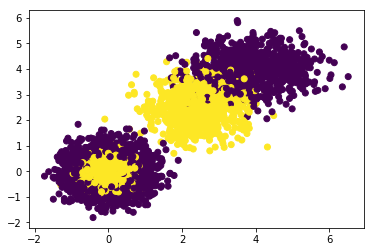

In [4]:
plt.scatter(data_final[:,0], data_final[:,1], c=target_final)
plt.show();

In [5]:
mask = np.arange(len(data_final))
np.random.shuffle(mask)
data = data_final[mask]
y = target_final[mask]

In [6]:
data_train, y_train = data[:1500], y[:1500]

In [7]:
model1 = RandomForestClassifier(n_estimators=2, max_depth=5)
model1.fit(data_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=2, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [8]:
model2 = SVC(probability=True, degree=3, kernel="poly")
model2.fit(data_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

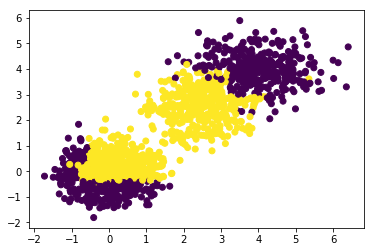

0.8026666666666666

In [9]:
plt.scatter(data[1500:,0], data[1500:,1], c=model1.predict(data[1500:]))
plt.show()
accuracy_score(y[1500:], model1.predict(data[1500:]))

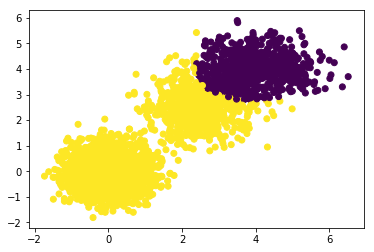

0.6988461538461539

In [10]:
plt.scatter(data[400:,0], data[400:,1], c=model2.predict(data[400:]))
plt.show()
accuracy_score(y[400:], model2.predict(data[400:]))

In [11]:
def proba_to_num(proba):
    p = []
    for x in proba:
        if x > 0.5: p.append(1)
        else: p.append(0)
    return np.array(p)

In [12]:
def combine_results(pred1, pred2):
    return (pred1 + pred2)/2

In [13]:
pred = combine_results(model2.predict_proba(data[1500:])[:, 1],
                       model1.predict_proba(data[1500:])[:, 1])

In [14]:
accuracy_score(y[1500:], proba_to_num(pred))

0.8046666666666666

In [15]:
np.corrcoef(model2.predict_proba(data[400:])[:, 1],
            model1.predict_proba(data[400:])[:, 1])

array([[1.        , 0.59216101],
       [0.59216101, 1.        ]])

In [16]:
models = [SVC(probability=True, degree=3, kernel="poly"),
                   RandomForestClassifier(n_estimators=2, max_depth=5)]
blender = Blender(models, LogisticRegression())


In [17]:
x_train, x_test, y_train, y_test = train_test_split(data, y, test_size=0.3, random_state=69)

In [18]:
blender.train(x_train, y_train)

In [19]:
pred = blender.predict(x_test)

In [20]:
accuracy_score(y_test, proba_to_num(pred[:, 1]))

0.8766666666666667

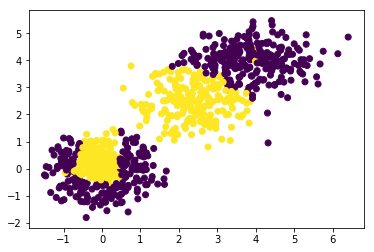

In [21]:
plt.scatter(x_test[:,0], x_test[:,1], c=proba_to_num(pred[:, 1]))
plt.show();

In [22]:
stacker = Stacking(Blender, LogisticRegression(), models, 
                   blend_size=0.3, test_size=0.2, folds=4)

In [23]:
stacker.train(x_train, y_train)

In [24]:
stack_pred = stacker.predict(x_test)



In [25]:
accuracy_score(proba_to_num(stack_pred[:,1]), y_test)

0.8344444444444444

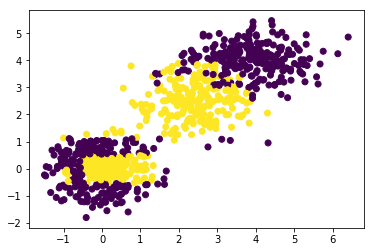

In [26]:
plt.scatter(x_test[:,0], x_test[:,1], 
            c=proba_to_num(stack_pred[:,1]))